In [81]:
import anndata
import os
import numpy as np
import pandas as pd

# Load the .h5ad file (replace with your filename)
input_file = os.path.join('data', 'cancer','brain.h5ad')
adata = anndata.read_h5ad(input_file)

print(adata.uns['dataset_name'])

counts = adata.layers['counts']
counts_df = pd.DataFrame(counts.toarray(), index=adata.obs_names, columns=adata.var_names)
# convert observations to a DataFrame
obs_df = adata.obs.copy()
#Join the counts_df with obs_df
joined_df = obs_df.join(counts_df, how='inner')
# Display the first few rows of the joined DataFrame
print("Joined DataFrame:")
joined_df.head()

10X Visium - Human Brain Cancer
Joined DataFrame:


,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,...,ENSG00000092377,ENSG00000099725,ENSG00000114374,ENSG00000067048,ENSG00000183878,ENSG00000154620,ENSG00000165246,ENSG00000286265,ENSG00000012817,ENSG00000198692
AACAATCCGAGTGGAC-1,1,103,47,7397,8.908965,21825.0,9.990857,15.647194,20.577320,26.666667,...,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,2.0
AACAATGTGCTCCGAG-1,1,98,158,8213,9.013595,30028.0,10.309918,11.412681,16.348075,22.911949,...,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,3.0,2.0
AACAATTATCTGCGCC-1,1,37,219,938,6.844815,1210.0,7.099202,21.735537,30.000000,39.008264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AACACCAGCCTACTCG-1,1,31,39,2732,7.913155,3241.0,8.083945,10.305461,13.390929,19.561864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACACCATTCGCATAC-1,1,53,139,5467,8.606668,11178.0,9.321793,16.970836,21.291823,26.632671,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:


# make a big df of all the data
all_data_df = joined_df.copy()

# drop columns n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_genes,size_factors
all_data_df.drop(columns=['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
                        'log1p_total_counts', 'pct_counts_in_top_50_genes',
                        'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
                        'pct_counts_in_top_500_genes', 'n_genes', 'size_factors'], inplace=True)

# work with all_data_df
# change index name to 'id'
all_data_df.reset_index(inplace=True)
all_data_df.rename(columns={'index': 'id'}, inplace=True)
# set index to id, in_tissue, array_row, array_col
all_data_df.set_index(['id', 'in_tissue', 'array_row', 'array_col'], inplace=True)
all_data_df

,,,,ENSG00000187634,ENSG00000188976,ENSG00000187961,ENSG00000187583,ENSG00000187642,ENSG00000188290,ENSG00000187608,ENSG00000188157,ENSG00000237330,ENSG00000131591,...,ENSG00000092377,ENSG00000099725,ENSG00000114374,ENSG00000067048,ENSG00000183878,ENSG00000154620,ENSG00000165246,ENSG00000286265,ENSG00000012817,ENSG00000198692
id,in_tissue,array_row,array_col,,,,,,,,,,,,,,,,,,,,,
AACAATCCGAGTGGAC-1,1,103,47,0.0,2.0,1.0,0.0,0.0,0.0,1.0,6.0,0.0,1.0,...,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,2.0
AACAATGTGCTCCGAG-1,1,98,158,1.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,...,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,3.0,2.0
AACAATTATCTGCGCC-1,1,37,219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AACACCAGCCTACTCG-1,1,31,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACACCATTCGCATAC-1,1,53,139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTTGGCCTGTAGCGG-1,1,40,78,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGTTGGTGATTAGGTA-1,1,108,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGTTGGTGCGCACGAG-1,1,24,108,0.0,1.0,1.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0,...,0.0,0.0,3.0,15.0,1.0,0.0,0.0,0.0,2.0,6.0


In [83]:
# find top 100 genes with greatest variance
top_variance_genes = all_data_df.var().nlargest(100)
# create a new DataFrame with only the top 100 genes
top_variance_genes_df = all_data_df[top_variance_genes.index]

In [84]:
# convert the DataFrame to a array
top_variance_genes_array = top_variance_genes_df.values
top_variance_genes_array

array([[240., 528.,  92., ...,   5.,   0.,  24.],
       [ 50.,   8.,   6., ...,  53.,  40.,  15.],
       [  6.,  33.,   3., ...,   0.,   1.,   0.],
       ...,
       [ 94.,   4., 145., ...,   7.,   3.,  41.],
       [ 89.,   2.,   1., ...,   1.,   2.,   6.],
       [100., 744., 122., ...,   2.,   1.,   4.]], dtype=float32)

In [85]:
# put x and y coordinates in a array
xy_coords_df = all_data_df.reset_index()[['array_row', 'array_col']]
xy_coords_array = xy_coords_df.values
xy_coords_array

array([[103,  47],
       [ 98, 158],
       [ 37, 219],
       ...,
       [ 24, 108],
       [ 37, 127],
       [ 83,  87]])

Points type: <class 'numpy.ndarray'>
Gene expression type: <class 'numpy.ndarray'>


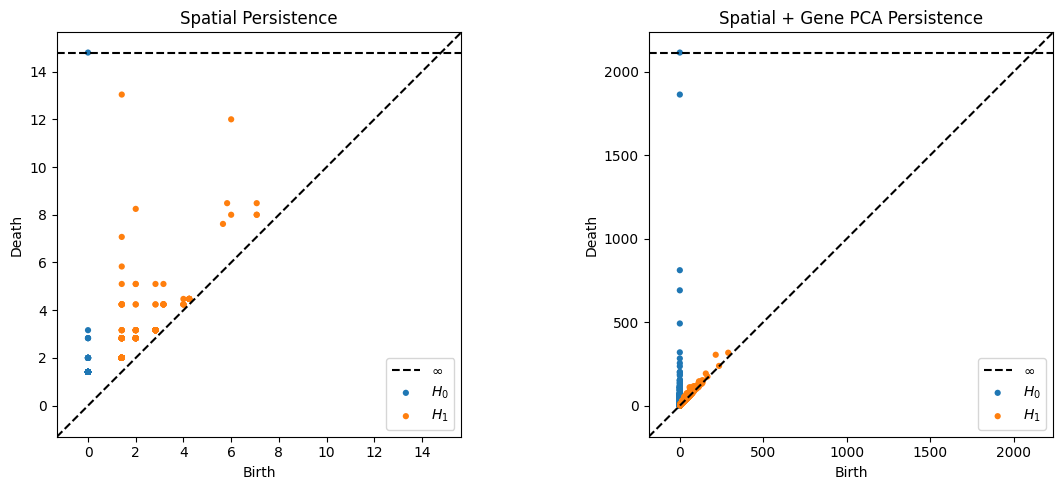

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from sklearn.decomposition import PCA

points = xy_coords_array
gene_expr = top_variance_genes_array

spatial_coords = points

# print types
print("Points type:", type(points))
print("Gene expression type:", type(gene_expr))


# spatial_coords = np.concatenate(points, axis=0)
# gene_expr = np.concatenate(gene_expr, axis=0)

# Step 2: PCA on gene expression
pca = PCA(n_components=2)
gene_pca = pca.fit_transform(gene_expr)

# Step 3: Combine spatial and gene PCA data
combined_data = np.hstack([spatial_coords, gene_pca])

# Step 4: Persistent homology
result_spatial = ripser(spatial_coords)
result_combined = ripser(combined_data)

# Step 5: Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title("Spatial Persistence")
plot_diagrams(result_spatial["dgms"], show=False, ax=axs[0])

axs[1].set_title("Spatial + Gene PCA Persistence")
plot_diagrams(result_combined["dgms"], show=False, ax=axs[1])

plt.tight_layout()
plt.show()

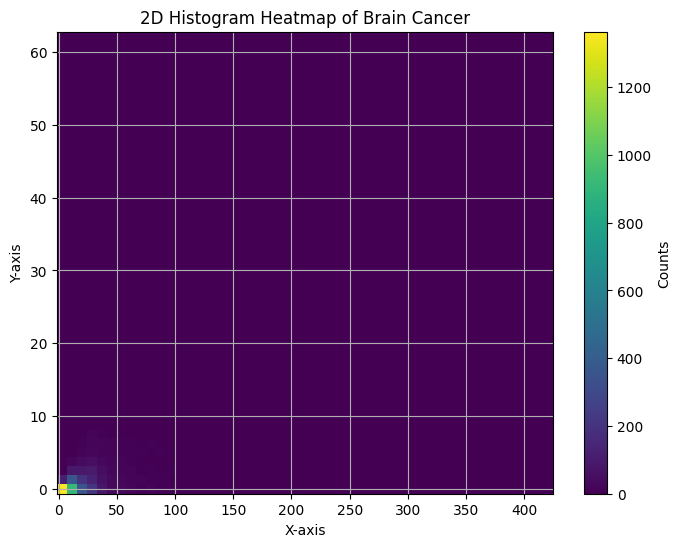

In [95]:
# convert a list of points to 2 lists of x and y coordinates
x_coords = [point[0] for point in result_combined["dgms"][1]]
y_coords = [point[1] for point in result_combined["dgms"][1]]
coords = np.array([x_coords, y_coords]).T
#rotate the points by 45 degrees clockwise
def rotate_points(points, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians)],
                                 [np.sin(angle_radians), np.cos(angle_radians)]])
    return points @ rotation_matrix.T
rotated_points = rotate_points(coords, -45)  # Rotate by -45 degrees

# Create a 2D histogram (heatmap) of the rotated points
heatmap, xedges, yedges = np.histogram2d(rotated_points[:, 0], rotated_points[:, 1], bins=50)
# Create a meshgrid for the heatmap
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, heatmap.T, shading='auto', cmap='viridis')
plt.colorbar(label='Counts')
plt.title('2D Histogram Heatmap of Brain Cancer')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# set yaxis to 0 - 30
# plt.gca().set_ylim(bottom=0, top=30)
# set xaxis to 0 - 100
# plt.gca().set_xlim(left=0, right=100)
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import kmapper as km

# Step 1: Generate synthetic X10-like gene expression data
# Simulate 3 clusters of cells in 50-dimensional gene space
test = top_variance_genes_df.reset_index(drop=True)
X = StandardScaler().fit_transform(test.values)

# Convert to DataFrame (simulate genes as columns)
gene_names = [f"Gene_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=gene_names)

# Step 2: Initialize KeplerMapper
mapper = km.KeplerMapper(verbose=1)

# Step 3: Use PCA as lens
lens = mapper.fit_transform(df, projection=PCA(n_components=2))

# Step 4: Create a Mapper graph
graph = mapper.map(
    lens,
    df.values,
    clusterer=DBSCAN(eps=5.0, min_samples=3),
    cover=km.Cover(n_cubes=50, perc_overlap=0.5)
)

# Step 5: Visualize (save HTML)
html_path = "mapper_x10_synthetic_test.html"
mapper.visualize(
    graph,
    path_html=html_path,
    title="Mapper on X10 Genomic Data"
)

html_path  # Return path to HTML file


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=2)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (10868, 100)

..Projecting data using: 
	PCA(n_components=2)


..Scaling with: MinMaxScaler()

Mapping on data shaped (10868, 100) using lens shaped (10868, 2)

Creating 2500 hypercubes.

Created 468 edges and 184 nodes in 0:00:05.683854.
Wrote visualization to: mapper_x10_synthetic_test.html


{'nodes': defaultdict(list,
             {'cube0_cluster0': [20,
               38,
               74,
               90,
               173,
               189,
               211,
               452,
               487,
               572,
               804,
               863,
               901,
               952,
               1202,
               1207,
               1258,
               1273,
               1478,
               1490,
               1530,
               1596,
               1614,
               1654,
               1762,
               1841,
               1842,
               2008,
               2517,
               2520,
               2562,
               2705,
               2746,
               2809,
               2819,
               2842,
               2960,
               3113,
               3138,
               3201,
               3329,
               3397,
               3443,
               3544,
               3655,
               3811,
      

In [99]:
graph['nodes']

defaultdict(list,
            {'cube0_cluster0': [20,
              38,
              74,
              90,
              173,
              189,
              211,
              452,
              487,
              572,
              804,
              863,
              901,
              952,
              1202,
              1207,
              1258,
              1273,
              1478,
              1490,
              1530,
              1596,
              1614,
              1654,
              1762,
              1841,
              1842,
              2008,
              2517,
              2520,
              2562,
              2705,
              2746,
              2809,
              2819,
              2842,
              2960,
              3113,
              3138,
              3201,
              3329,
              3397,
              3443,
              3544,
              3655,
              3811,
              3814,
              3828,
              3905,
  

In [103]:
graph.keys()

dict_keys(['nodes', 'links', 'simplices', 'meta_data', 'meta_nodes'])

In [106]:
graph['links']

defaultdict(list,
            {'cube0_cluster0': ['cube1_cluster0',
              'cube8_cluster0',
              'cube9_cluster0'],
             'cube1_cluster0': ['cube2_cluster0',
              'cube8_cluster0',
              'cube9_cluster0',
              'cube10_cluster0'],
             'cube2_cluster0': ['cube3_cluster0',
              'cube9_cluster0',
              'cube10_cluster0',
              'cube11_cluster0'],
             'cube3_cluster0': ['cube4_cluster0',
              'cube10_cluster0',
              'cube11_cluster0',
              'cube12_cluster0'],
             'cube4_cluster0': ['cube5_cluster0',
              'cube11_cluster0',
              'cube12_cluster0',
              'cube13_cluster0'],
             'cube5_cluster0': ['cube12_cluster0',
              'cube13_cluster0',
              'cube14_cluster0'],
             'cube8_cluster0': ['cube9_cluster0',
              'cube18_cluster0',
              'cube19_cluster0',
              'cube20_cluster0'],
  

In [ ]:
def find_connected_components(graph):
    """
    Find all connected components in an undirected graph represented by an adjacency list.

    Args:
        graph (dict): Dictionary where keys are nodes and values are lists of adjacent nodes.

    Returns:
        list: List of sets, where each set contains nodes in a connected component.
    """
    def dfs(node, visited, component):
        """
        Depth-First Search to explore all nodes in a connected component.

        Args:
            node (str): Current node being explored.
            visited (set): Set of nodes already visited.
            component (set): Current connected component being built.
        """
        visited.add(node)
        component.add(node)
        # Explore all neighbors
        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                dfs(neighbor, visited, component)

    visited = set()
    components = []

    # Iterate over all nodes to ensure all components are found
    for node in graph:
        if node not in visited:
            current_component = set()
            dfs(node, visited, current_component)
            components.append(current_component)

    # Add isolated nodes (nodes not in graph keys but in values)
    all_nodes = set(graph.keys())
    for neighbors in graph.values():
        all_nodes.update(neighbors)

    for node in all_nodes:
        if node not in visited:
            components.append({node})
            visited.add(node)

    return components

# Example usage with the provided data
graph_test = graph['links']

components = find_connected_components(graph_test)

# Print the connected components
for i, component in enumerate(components, 1):
    print(f"Component {i}: {component}")

Component 1: {'cube11_cluster0', 'cube3_cluster0', 'cube8_cluster0', 'cube9_cluster0', 'cube2_cluster0', 'cube12_cluster0', 'cube18_cluster0', 'cube14_cluster0', 'cube4_cluster0', 'cube13_cluster0', 'cube1_cluster0', 'cube5_cluster0', 'cube10_cluster0', 'cube0_cluster0'}


In [108]:
len(components)  # Return the number of connected components found

1